In [1]:
#Import Libraries  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# File path to CSV file
file_path = 'churn_raw_data.csv'

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display df [In text Citation: (How do I expand the output display to see more columns of a pandas DataFrame?, 2021)]
pd.set_option("display.max_columns", None)
df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3.0,NaN,"Some College, Less than 1 Year",Retired,55723.74,Married,Male,No,9.265392,12,2,0,NaN,Month-to-month,Yes,Yes,DSL,NaN,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4.0,48.0,Regular High School Diploma,Part Time,NaN,Divorced,Male,No,8.115849,15,2,0,NaN,Two Year,No,No,Fiber Optic,NaN,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,NaN,NaN,Nursery School to 8th Grade,Full Time,NaN,Never Married,Female,No,4.837696,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),NaN,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1.0,39.0,Bachelor's Degree,Full Time,16667.58,Separated,Male,No,12.076460,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.

In [4]:
# Get basic info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [5]:
#Detect Duplicates 
df.duplicated()

print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [6]:
# Detect Missing Values 
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [7]:
#Print total missing values within dataset
total_missing = missing_values.sum()
print("Total Missing Values:", total_missing)

Total Missing Values: 16035


<Axes: xlabel='Population'>

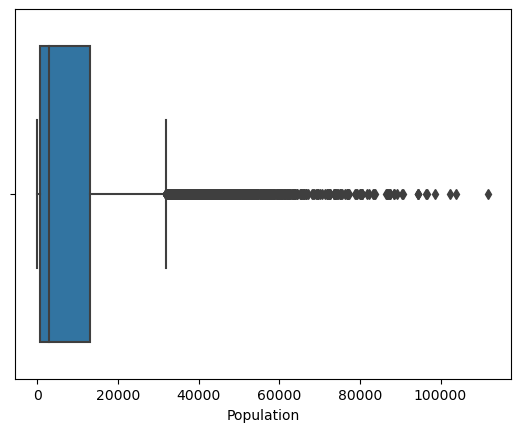

In [8]:
#Create boxplot for the "Population" column [In text citation: (Seaborn.boxplot, n.d.)]
sns.boxplot(x=df["Population"]) 

In [9]:
#Create function to detect outliers [In text citation: (Kleppen, 2023)] 
def treatOutlier(df, qvar):
    df[qvar].fillna(df[qvar].median(), inplace=True)
    sd=df[qvar].std()
    print("sd:", sd)
    print(df[qvar].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 1]))
    q1=df[qvar].quantile(0.25)
    print("Q1:", q1)
    q3=df[qvar].quantile(0.75)
    print("Q3:", q3)
    q2=df[qvar].quantile(0.5)
    print("Q2:", q2)
    IQR=q3-q1
    print("IQR:", IQR)
    max=q3+1.5*IQR
    min=q1-1.5*IQR
    
#Whiskers
    print("Upper Whisker: "+ str(max))
    print("Lower Whisker: " + str(min))
    
#Outliers
    outliers = df[qvar][((df[qvar]<(q1-1.5*IQR)) | (df[qvar]>(q3+1.5*IQR)))]
    print("number of outliers: "+ str(len(outliers)))
    print("max outlier value: "+ str(outliers.max()))
    print("min outlier value: "+ str(outliers.min()))
    outliers

In [10]:
df = pd.read_csv(file_path)
#Analyze the "Population" variable
treatOutlier(df, "Population")

sd: 14432.69867076143
count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
10%         211.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
90%       30558.000000
95%       40770.400000
99%       62429.000000
99.9%     90517.158000
100%     111850.000000
max      111850.000000
Name: Population, dtype: float64
Q1: 738.0
Q3: 13168.0
Q2: 2910.5
IQR: 12430.0
Upper Whisker: 31813.0
Lower Whisker: -17907.0
number of outliers: 937
max outlier value: 111850
min outlier value: 31816


<Axes: xlabel='Children'>

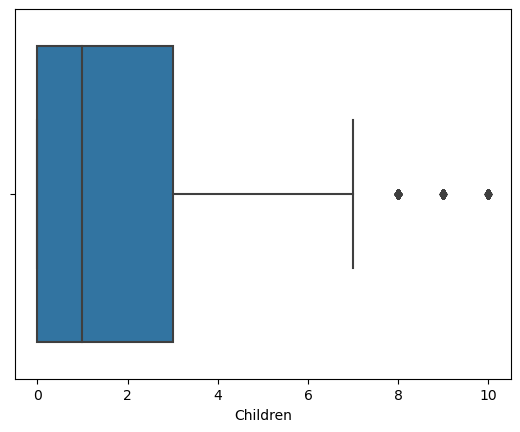

In [11]:
#Create boxplot for the "Children" column
sns.boxplot(x=df["Children"])

In [12]:
#Analyze the "Children" variable
treatOutlier(df, "Children")

sd: 1.9259711021894639
count    10000.000000
mean         1.822500
std          1.925971
min          0.000000
10%          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
90%          4.000000
95%          6.000000
99%          9.000000
99.9%       10.000000
100%        10.000000
max         10.000000
Name: Children, dtype: float64
Q1: 1.0
Q3: 3.0
Q2: 1.0
IQR: 2.0
Upper Whisker: 6.0
Lower Whisker: -2.0
number of outliers: 451
max outlier value: 10.0
min outlier value: 7.0


<Axes: xlabel='Age'>

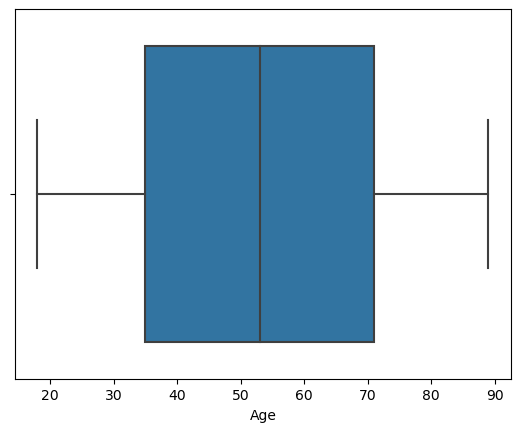

In [13]:
#Create boxplot for the "Age" column
sns.boxplot(x=df["Age"])

In [14]:
#Analyze the "Age" variable
treatOutlier(df, "Age")

sd: 18.003456784618603
count    10000.000000
mean        53.207500
std         18.003457
min         18.000000
10%         27.000000
25%         41.000000
50%         53.000000
75%         65.000000
90%         80.000000
95%         84.000000
99%         88.000000
99.9%       89.000000
100%        89.000000
max         89.000000
Name: Age, dtype: float64
Q1: 41.0
Q3: 65.0
Q2: 53.0
IQR: 24.0
Upper Whisker: 101.0
Lower Whisker: 5.0
number of outliers: 0
max outlier value: nan
min outlier value: nan


<Axes: xlabel='Income'>

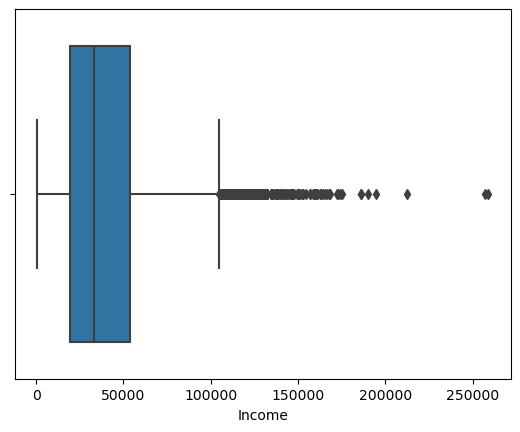

In [15]:
#Create boxplot for the "Income" column
sns.boxplot(x=df["Income"])

In [16]:
#Analyze the "Income" variable
treatOutlier(df, "Income")

sd: 24747.872760841317
count     10000.000000
mean      38256.017897
std       24747.872761
min         740.660000
10%       12711.105000
25%       23660.790000
50%       33186.785000
75%       45504.192500
90%       71003.771000
95%       87433.556500
99%      126807.764000
99.9%    172372.711910
100%     258900.700000
max      258900.700000
Name: Income, dtype: float64
Q1: 23660.79
Q3: 45504.1925
Q2: 33186.785
IQR: 21843.402499999997
Upper Whisker: 78269.29624999998
Lower Whisker: -9104.313749999994
number of outliers: 759
max outlier value: 258900.7
min outlier value: 78272.96


<Axes: xlabel='Outage_sec_perweek'>

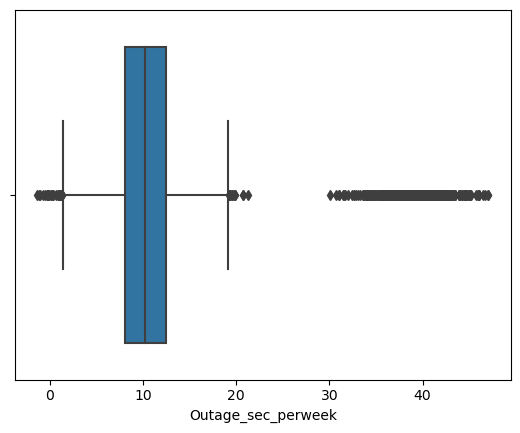

In [17]:
#Create boxplot for the "Outage_sec_perweek" column
sns.boxplot(x=df["Outage_sec_perweek"])

In [18]:
#Analyze the "Outage_sec_perweek" variable
treatOutlier(df, "Outage_sec_perweek")

sd: 7.02592095478377
count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
10%          6.112013
25%          8.054362
50%         10.202896
75%         12.487644
90%         15.114312
95%         21.657349
99%         41.275592
99.9%       45.067223
100%        47.049280
max         47.049280
Name: Outage_sec_perweek, dtype: float64
Q1: 8.054362000000001
Q3: 12.487643622499998
Q2: 10.20289623
IQR: 4.433281622499997
Upper Whisker: 19.137566056249995
Lower Whisker: 1.404439566250005
number of outliers: 539
max outlier value: 47.04928
min outlier value: -1.348571


<Axes: xlabel='Email'>

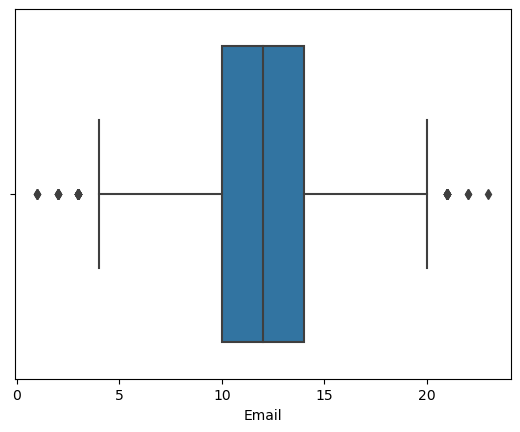

In [19]:
#Create boxplot for the "Email" column
sns.boxplot(x=df["Email"])

In [20]:
#Analyze the "Email" variable
treatOutlier(df, "Email")

sd: 3.025898148642877
count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
10%          8.000000
25%         10.000000
50%         12.000000
75%         14.000000
90%         16.000000
95%         17.000000
99%         19.000000
99.9%       21.000000
100%        23.000000
max         23.000000
Name: Email, dtype: float64
Q1: 10.0
Q3: 14.0
Q2: 12.0
IQR: 4.0
Upper Whisker: 20.0
Lower Whisker: 4.0
number of outliers: 38
max outlier value: 23
min outlier value: 1


<Axes: xlabel='Contacts'>

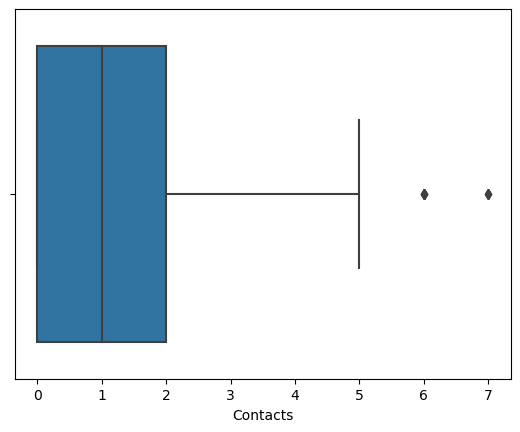

In [21]:
#Create boxplot for the "Contacts" column
sns.boxplot(x=df["Contacts"])

In [22]:
#Analyze the "Contacts" variable
treatOutlier(df, "Contacts")

sd: 0.9884655109848903
count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
10%          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
90%          2.000000
95%          3.000000
99%          4.000000
99.9%        5.000000
100%         7.000000
max          7.000000
Name: Contacts, dtype: float64
Q1: 0.0
Q3: 2.0
Q2: 1.0
IQR: 2.0
Upper Whisker: 5.0
Lower Whisker: -3.0
number of outliers: 8
max outlier value: 7
min outlier value: 6


<Axes: xlabel='Yearly_equip_failure'>

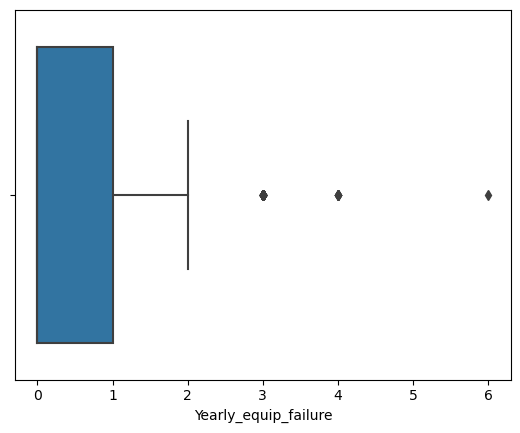

In [23]:
#Create boxplot for the "Yearly_equip_failure" column
sns.boxplot(x=df["Yearly_equip_failure"])

In [24]:
#Analyze the "Yearly_equip_failure" variable
treatOutlier(df, "Yearly_equip_failure") 

sd: 0.6359531772420812
count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          1.000000
95%          2.000000
99%          2.000000
99.9%        3.000000
100%         6.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64
Q1: 0.0
Q3: 1.0
Q2: 0.0
IQR: 1.0
Upper Whisker: 2.5
Lower Whisker: -1.5
number of outliers: 94
max outlier value: 6
min outlier value: 3


<Axes: xlabel='Tenure'>

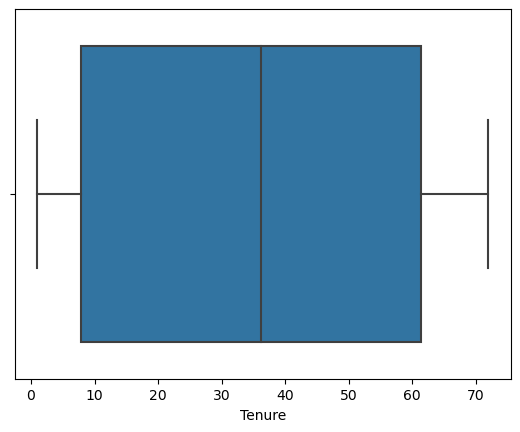

In [25]:
#Create boxplot for the "Tenure" column
sns.boxplot(x=df["Tenure"])

In [26]:
#Analyze the "Tenure" variable
treatOutlier(df, "Tenure") 

sd: 25.182812005537077
count    10000.000000
mean        34.656864
std         25.182812
min          1.000259
10%          3.954279
25%          8.700329
50%         36.196030
75%         60.153487
90%         67.450641
95%         69.802892
99%         71.541154
99.9%       71.957135
100%        71.999280
max         71.999280
Name: Tenure, dtype: float64
Q1: 8.700329255749999
Q3: 60.1534875
Q2: 36.19603
IQR: 51.45315824425
Upper Whisker: 137.333224866375
Lower Whisker: -68.479408110625
number of outliers: 0
max outlier value: nan
min outlier value: nan


<Axes: xlabel='MonthlyCharge'>

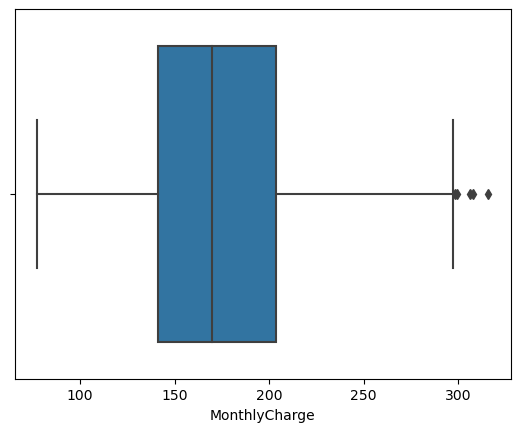

In [27]:
#Create boxplot for the "MonthlyCharge" column
sns.boxplot(x=df["MonthlyCharge"])

In [28]:
#Analyze the "MonthlyCharge" variable
treatOutlier(df, "MonthlyCharge")

sd: 43.33547318024725
count    10000.000000
mean       174.076305
std         43.335473
min         77.505230
10%        120.340354
25%        141.071078
50%        169.915400
75%        203.777441
90%        238.683060
95%        253.824616
99%        275.859482
99.9%      291.935547
100%       315.878600
max        315.878600
Name: MonthlyCharge, dtype: float64
Q1: 141.07107845
Q3: 203.777441275
Q2: 169.9154
IQR: 62.706362825000014
Upper Whisker: 297.8369855125
Lower Whisker: 47.01153421249997
number of outliers: 5
max outlier value: 315.8786
min outlier value: 298.1730235


<Axes: xlabel='Bandwidth_GB_Year'>

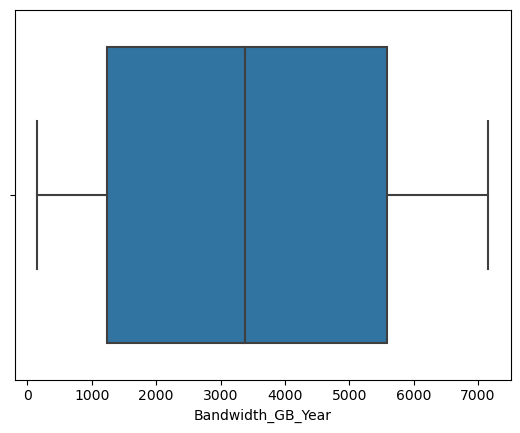

In [29]:
#Create boxplot for the "Bandwidth_GB_Year" column
sns.boxplot(x=df["Bandwidth_GB_Year"])

In [30]:
#Analyze the "Bandwidth_GB_Year" variable
treatOutlier(df, "Bandwidth_GB_Year")

sd: 2072.7185747276853
count    10000.000000
mean      3397.166397
std       2072.718575
min        155.506715
10%        842.435583
25%       1312.130487
50%       3382.424000
75%       5466.284500
90%       6094.402900
95%       6343.389900
99%       6716.653880
99.9%     6988.588069
100%      7158.982000
max       7158.982000
Name: Bandwidth_GB_Year, dtype: float64
Q1: 1312.130487
Q3: 5466.2845
Q2: 3382.424
IQR: 4154.154012999999
Upper Whisker: 11697.515519499999
Lower Whisker: -4919.100532499999
number of outliers: 0
max outlier value: nan
min outlier value: nan


<Axes: xlabel='item1'>

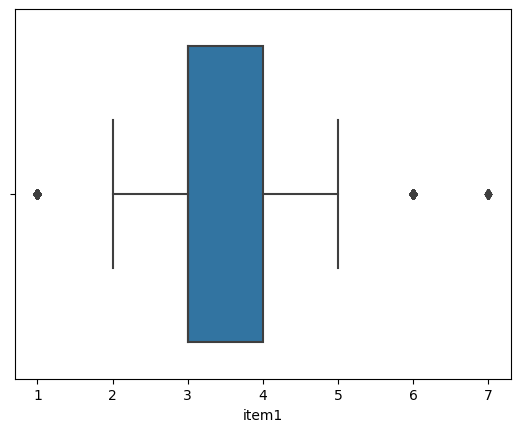

In [31]:
#Create boxplot for the "item1" column
sns.boxplot(x=df["item1"])

In [32]:
#Analyze the "item1" variable
treatOutlier(df, "item1")

sd: 1.0377972163704643
count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
10%          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
90%          5.000000
95%          5.000000
99%          6.000000
99.9%        7.000000
100%         7.000000
max          7.000000
Name: item1, dtype: float64
Q1: 3.0
Q3: 4.0
Q2: 3.0
IQR: 1.0
Upper Whisker: 5.5
Lower Whisker: 1.5
number of outliers: 442
max outlier value: 7
min outlier value: 1


<Axes: xlabel='item2'>

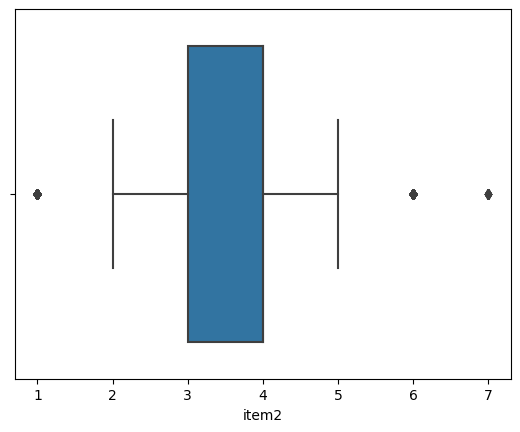

In [33]:
#Create boxplot for the "item2" column
sns.boxplot(x=df["item2"])

In [34]:
#Analyze the "item2" variable
treatOutlier(df, "item2")

sd: 1.034640535695296
count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
10%          2.000000
25%          3.000000
50%          4.000000
75%          4.000000
90%          5.000000
95%          5.000000
99%          6.000000
99.9%        7.000000
100%         7.000000
max          7.000000
Name: item2, dtype: float64
Q1: 3.0
Q3: 4.0
Q2: 4.0
IQR: 1.0
Upper Whisker: 5.5
Lower Whisker: 1.5
number of outliers: 445
max outlier value: 7
min outlier value: 1


<Axes: xlabel='item3'>

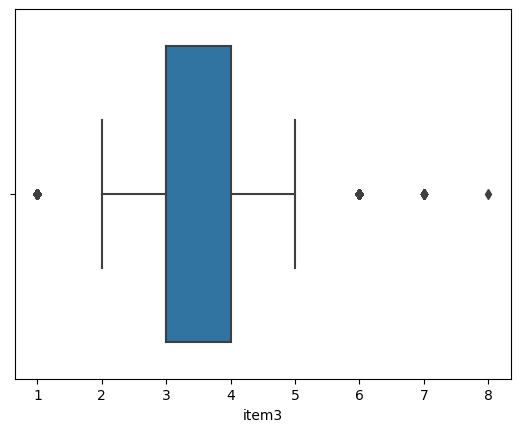

In [35]:
#Create boxplot for the "item3" column
sns.boxplot(x=df["item3"])

In [36]:
#Analyze the "item3" variable
treatOutlier(df, "item3")

sd: 1.0279769810979809
count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
10%          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
90%          5.000000
95%          5.000000
99%          6.000000
99.9%        7.000000
100%         8.000000
max          8.000000
Name: item3, dtype: float64
Q1: 3.0
Q3: 4.0
Q2: 3.0
IQR: 1.0
Upper Whisker: 5.5
Lower Whisker: 1.5
number of outliers: 418
max outlier value: 8
min outlier value: 1


<Axes: xlabel='item4'>

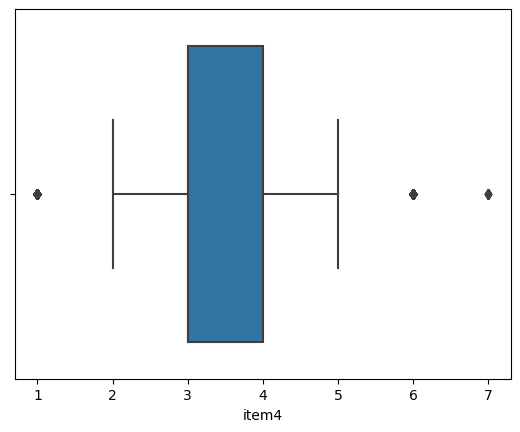

In [37]:
#Create boxplot for the "item4" column
sns.boxplot(x=df["item4"])

In [38]:
#Analyze the "item4" variable
treatOutlier(df, "item4")

sd: 1.0258162505526822
count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
10%          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
90%          5.000000
95%          5.000000
99%          6.000000
99.9%        6.000000
100%         7.000000
max          7.000000
Name: item4, dtype: float64
Q1: 3.0
Q3: 4.0
Q2: 3.0
IQR: 1.0
Upper Whisker: 5.5
Lower Whisker: 1.5
number of outliers: 433
max outlier value: 7
min outlier value: 1


<Axes: xlabel='item5'>

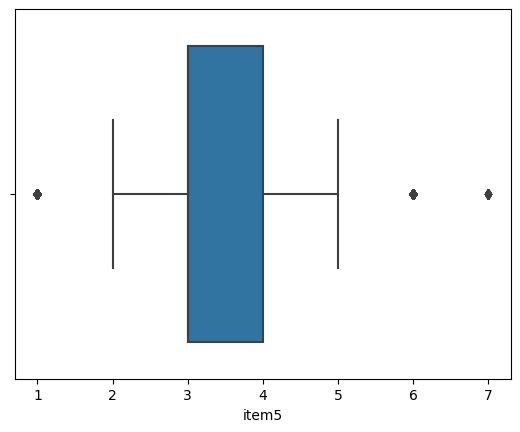

In [39]:
#Create boxplot for the "item5" column
sns.boxplot(x=df["item5"])

In [40]:
#Analyze the "item5" variable
treatOutlier(df, "item5")

sd: 1.0248193086888684
count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
10%          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
90%          5.000000
95%          5.000000
99%          6.000000
99.9%        7.000000
100%         7.000000
max          7.000000
Name: item5, dtype: float64
Q1: 3.0
Q3: 4.0
Q2: 3.0
IQR: 1.0
Upper Whisker: 5.5
Lower Whisker: 1.5
number of outliers: 422
max outlier value: 7
min outlier value: 1


<Axes: xlabel='item6'>

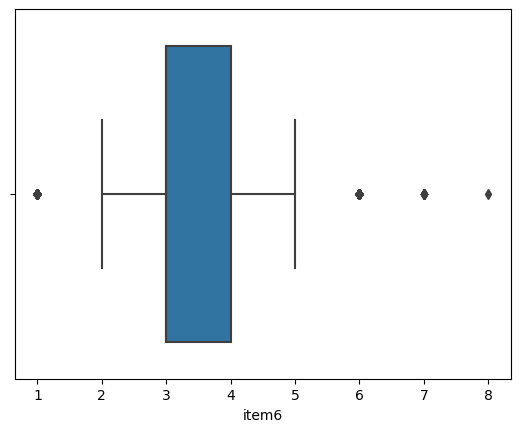

In [41]:
#Create boxplot for the "item6" column
sns.boxplot(x=df["item6"])

In [42]:
#Analyze the "item6" variable
treatOutlier(df, "item6")

sd: 1.0335857680685943
count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
10%          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
90%          5.000000
95%          5.000000
99%          6.000000
99.9%        7.000000
100%         8.000000
max          8.000000
Name: item6, dtype: float64
Q1: 3.0
Q3: 4.0
Q2: 3.0
IQR: 1.0
Upper Whisker: 5.5
Lower Whisker: 1.5
number of outliers: 413
max outlier value: 8
min outlier value: 1


<Axes: xlabel='item7'>

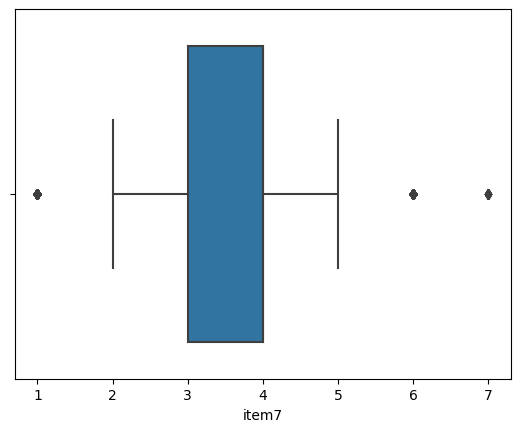

In [43]:
#Create boxplot for the "item7" column
sns.boxplot(x=df["item7"])

In [44]:
#Analyze the "item7" variable
treatOutlier(df, "item7")

sd: 1.028501595308982
count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
10%          2.000000
25%          3.000000
50%          4.000000
75%          4.000000
90%          5.000000
95%          5.000000
99%          6.000000
99.9%        7.000000
100%         7.000000
max          7.000000
Name: item7, dtype: float64
Q1: 3.0
Q3: 4.0
Q2: 4.0
IQR: 1.0
Upper Whisker: 5.5
Lower Whisker: 1.5
number of outliers: 454
max outlier value: 7
min outlier value: 1


<Axes: xlabel='item8'>

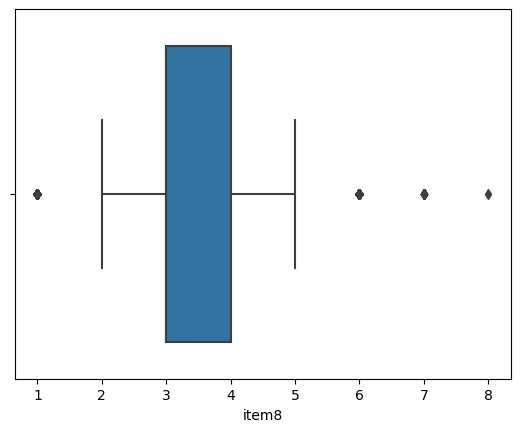

In [45]:
#Create boxplot for the "item8" column
sns.boxplot(x=df["item8"])

In [46]:
#Analyze the "item8" variable
treatOutlier(df, "item8")

sd: 1.0286332916276941
count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
10%          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
90%          5.000000
95%          5.000000
99%          6.000000
99.9%        7.000000
100%         8.000000
max          8.000000
Name: item8, dtype: float64
Q1: 3.0
Q3: 4.0
Q2: 3.0
IQR: 1.0
Upper Whisker: 5.5
Lower Whisker: 1.5
number of outliers: 426
max outlier value: 8
min outlier value: 1


<Axes: xlabel='CaseOrder'>

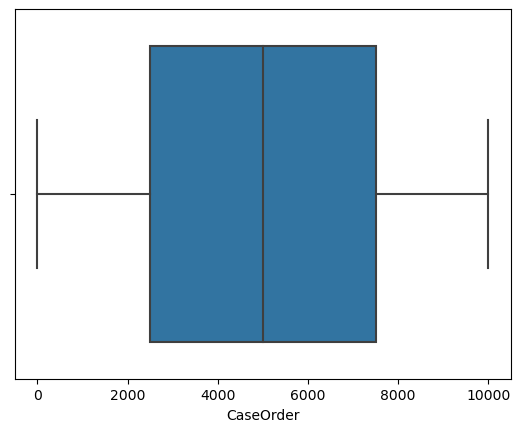

In [47]:
#Create boxplot for the "CaseOrder" column
sns.boxplot(x=df["CaseOrder"])

In [48]:
#Analyze the "CaseOrder" variable
treatOutlier(df, "CaseOrder")

sd: 2886.8956799071675
count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
10%       1000.90000
25%       2500.75000
50%       5000.50000
75%       7500.25000
90%       9000.10000
95%       9500.05000
99%       9900.01000
99.9%     9990.00100
100%     10000.00000
max      10000.00000
Name: CaseOrder, dtype: float64
Q1: 2500.75
Q3: 7500.25
Q2: 5000.5
IQR: 4999.5
Upper Whisker: 14999.5
Lower Whisker: -4998.5
number of outliers: 0
max outlier value: nan
min outlier value: nan


<Axes: xlabel='Zip'>

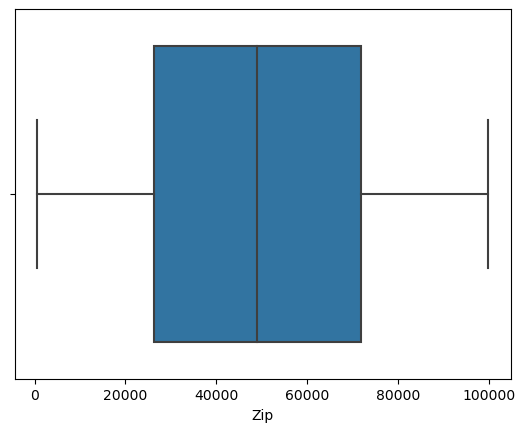

In [49]:
#Create boxplot for the "Zip" column
sns.boxplot(x=df["Zip"])

In [50]:
#Analyze the "Zip" variable
treatOutlier(df, "Zip")

sd: 27532.19610782447
count    10000.000000
mean     49153.319600
std      27532.196108
min        601.000000
10%      12511.600000
25%      26292.500000
50%      48869.500000
75%      71866.500000
90%      88204.000000
95%      95476.000000
99%      99141.060000
99.9%    99786.049000
100%     99929.000000
max      99929.000000
Name: Zip, dtype: float64
Q1: 26292.5
Q3: 71866.5
Q2: 48869.5
IQR: 45574.0
Upper Whisker: 140227.5
Lower Whisker: -42068.5
number of outliers: 0
max outlier value: nan
min outlier value: nan


<Axes: xlabel='Lat'>

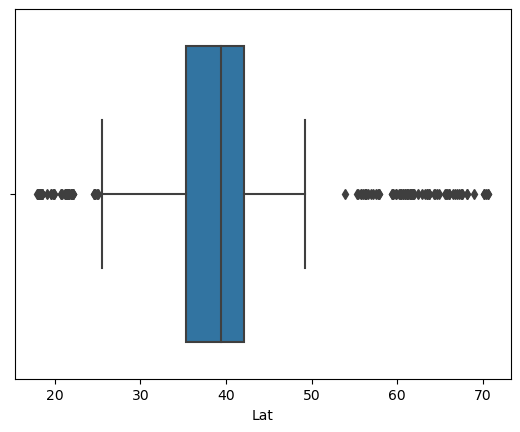

In [51]:
#Create boxplot for the "Lat" column
sns.boxplot(x=df["Lat"])

In [52]:
#Analyze the "Lat" variable
treatOutlier(df, "Lat")

sd: 5.437388642740164
count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
10%         31.854840
25%         35.341828
50%         39.395800
75%         42.106908
90%         44.640570
95%         46.445216
99%         48.778450
99.9%       67.477117
100%        70.640660
max         70.640660
Name: Lat, dtype: float64
Q1: 35.3418275
Q3: 42.106907500000005
Q2: 39.3958
IQR: 6.765080000000005
Upper Whisker: 52.25452750000001
Lower Whisker: 25.194207499999994
number of outliers: 158
max outlier value: 70.64066
min outlier value: 17.96612


<Axes: xlabel='Lng'>

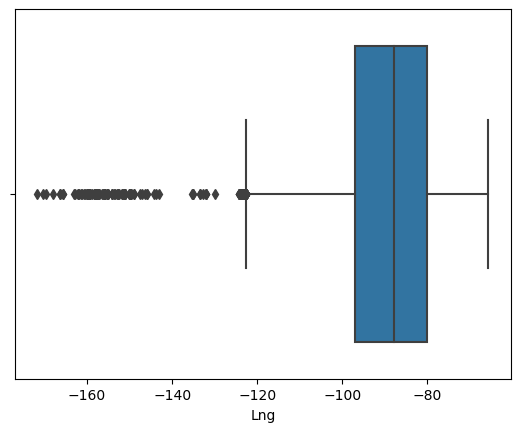

In [53]:
#Create boxplot for the "Lng" column
sns.boxplot(x=df["Lng"])

In [54]:
#Analyze the "Lng" variable
treatOutlier(df, "Lng")

sd: 15.156141522532046
count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
10%       -115.239730
25%        -97.082812
50%        -87.918800
75%        -80.088745
90%        -74.717810
95%        -72.717865
99%        -69.623071
99.9%      -66.071878
100%       -65.667850
max        -65.667850
Name: Lng, dtype: float64
Q1: -97.08281249999999
Q3: -80.088745
Q2: -87.9188
IQR: 16.994067499999986
Upper Whisker: -54.597643750000024
Lower Whisker: -122.57391374999997
number of outliers: 273
max outlier value: -122.5884
min outlier value: -171.68815


In [55]:
# Check value counts for items 1-8 columns [In text citation: (How to get value counts for multiple columns at once in pandas DataFrame?, 2015)]
for i in range(1, 9):
    column_name = f'item{i}'
    print(df[column_name].value_counts())

item1
3    3448
4    3358
2    1393
5    1359
1     224
6     199
7      19
Name: count, dtype: int64
item2
3    3415
4    3412
5    1368
2    1360
1     217
6     215
7      13
Name: count, dtype: int64
item3
3    3435
4    3410
2    1424
5    1313
6     203
1     202
7      12
8       1
Name: count, dtype: int64
item4
4    3452
3    3430
2    1350
5    1335
1     221
6     203
7       9
Name: count, dtype: int64
item5
3    3462
4    3417
2    1378
5    1321
1     206
6     204
7      12
Name: count, dtype: int64
item6
3    3445
4    3333
2    1427
5    1382
6     210
1     190
7      12
8       1
Name: count, dtype: int64
item7
4    3456
3    3446
5    1335
2    1309
6     224
1     219
7      11
Name: count, dtype: int64
item8
3    3461
4    3400
2    1378
5    1335
1     206
6     205
7      14
8       1
Name: count, dtype: int64


In [56]:
# Check value counts for the "Timezone" column
df.Timezone.value_counts()

Timezone
America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: count, dty

In [57]:
# Check value counts for the "Customer_id" column
df.Customer_id.value_counts()

Customer_id
K409198    1
X300173    1
M155745    1
G126132    1
O148559    1
          ..
F454437    1
W845098    1
P854487    1
K983374    1
T38070     1
Name: count, Length: 10000, dtype: int64

In [58]:
# Check value counts for the "Education" column
df.Education.value_counts()

Education
Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: count, dtype: int64

In [59]:
# Check value counts for the "Zip" column
df.Zip.value_counts()

Zip
32340    4
75077    4
44310    4
61764    4
16115    4
        ..
43788    1
58579    1
53526    1
79104    1
30523    1
Name: count, Length: 8583, dtype: int64

In [60]:
# Check value counts for the "PaymentMethod" column
print(df['PaymentMethod'].value_counts())

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64


In [61]:
# Check value counts for the "MonthlyCharge" column
print(df['MonthlyCharge'].value_counts())

MonthlyCharge
137.4757    3
147.4886    2
115.4933    2
172.9128    2
192.3656    2
           ..
105.9719    1
236.1058    1
150.8860    1
150.3587    1
218.3710    1
Name: count, Length: 9984, dtype: int64


In [62]:
# Check value counts for the "Gender" column
print(df['Gender'].value_counts())

Gender
Female                  5025
Male                    4744
Prefer not to answer     231
Name: count, dtype: int64


In [63]:
# Check value counts for the "Marital" column
print(df['Marital'].value_counts())

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64


In [64]:
# Check value counts for the "Contract" column
print(df['Contract'].value_counts())

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64


In [65]:
# Check value counts for the "InternetService" column
print(df['InternetService'].value_counts())

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64
